# Question 3: Logistic Regression

In [1]:
#Import all the required libraries
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10.0, 6.0)
from mpl_toolkits.mplot3d import Axes3D
import time
import math
from sklearn.linear_model import LogisticRegression
import random

## Load the data

In [2]:
# load the data
# Perform important operations on the data
x = pd.read_csv("class0-input.csv")
y = pd.read_csv("class1-input.csv")
label = pd.read_csv("labels.csv")

## Check the shape

In [3]:
# Shape of X
# Shape of Y
print(x.shape)
print(y.shape)
print(label.shape)

(5000, 2)
(5000, 2)
(10000, 1)


## Visualize the data

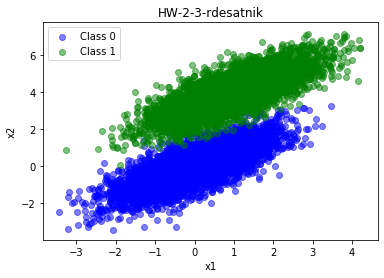

In [4]:
# Use different colors for each class
# Use plt.scatter
# Dont forget to add axes titles, graph title, legend
plt.scatter(x.x1,x.x2, c="blue", alpha=0.5, label="Class 0")
plt.scatter(y.x1,y.x2, c="green", alpha=0.5, label="Class 1")
plt.title("HW-2-3-rdesatnik")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()


## Define the required functions

In [5]:
import csv
x0list= [] 
x1list= [] 
with open("class0-input.csv") as csv_file: 
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        if row[0] == 'x1':
            skip = 1
        else:
            x0 = [float(row[0]),float(row[1])]
            x0list.append(x0)

with open("class1-input.csv") as csv_file: 
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        if row[0] == 'x1':
            skip = 1
        else:
            x1 = [float(row[0]),float(row[1])]
            x1list.append(x1)

ylistall= [] 
with open("labels.csv") as csv_file: 
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        if row[0] == 'label':
            skip = 1
        else:
            labeling = float(row[0])
            ylistall.append(labeling)
            
xlistall = x0list+x1list                       
X = np.array(xlistall)
Y = np.array(ylistall)

In [6]:
# Pass in the required arguments
# Implement the sigmoid function
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [7]:
def Pred(weight,X):
    z = np.array(weight[0]+weight[1]*np.array(X[:,0])+weight[2]*np.array(X[:,1]))
    return sigmoid(z)

In [8]:
# Pass in the required arguments
# The function should return the gradients
#def grad(w, X, Y):
def calculate_gradients(weight, X, Y):
        pred = Pred(weight,X)
        gradient = [0]*3
        gradient[0] = -1 * sum(Y*(1-pred) - (1-Y)*pred)
        gradient[1] = -1 * sum(Y*(1-pred)*X[:,0] - (1-Y)*pred*X[:,0])
        gradient[2] = -1 * sum(Y*(1-pred)*X[:,1] - (1-Y)*pred*X[:,1])
        return gradient


In [9]:
# Update the weights using gradients calculated using above function and learning rate
# The function should return the updated weights to be used in the next step
def update_weights(current_grads, prev_weights, learning_rate, iteratnum=100):
    UWlist = []
    iterat = 0
    while True:
        prev_weights = current_grads
        weight0 = prev_weights[0] - learning_rate*calculate_gradients(prev_weights,X,Y)[0]
        weight1 = prev_weights[1] - learning_rate*calculate_gradients(prev_weights,X,Y)[1]
        weight2 = prev_weights[2] - learning_rate*calculate_gradients(prev_weights,X,Y)[2]
        current_grads = [weight0, weight1, weight2]
        UWlist.append(current_grads)
        if (current_grads[0]-prev_weights[0])**2 + (current_grads[1]-prev_weights[1])**2 + (current_grads[2]-prev_weights[2])**2 <pow(10,-6):
            return current_grads, UWlist
        
        if iterat>iteratnum:
            return current_grads, UWlist
        iterat = iterat + 1


In [10]:
randomlist = []
for i in range(0,3):
    n = random.randint(1,20)
    randomlist.append(n)
print(randomlist)

[6, 11, 14]


In [11]:
#########################################
# Use the implemented functions in the main function
# 'main' fucntion should return weights after all the iterations
# Dont forget to divide by the number of datapoints wherever necessary!
# Initialize the intial weights randomly
randomlist = []
for i in range(0,3):
    n = random.randint(1,20)
    randomlist.append(n)
inputweights = randomlist

def main(X, Y, weights, learning_rate = 0.00005, num_steps = 50000):
    inputweights = weights      
    UW, UWlist = update_weights(inputweights,inputweights,learning_rate,iteratnum=num_steps)
    return UW, UWlist

UW, UWlist = main(X=X, Y=Y, weights=inputweights, learning_rate = 0.00005, num_steps = 50000)
#Final Weights
print(UW)
#Weights after all iterations
print(UWlist)

[-7.908229970821098, -2.8353053411369236, 4.733609669410209]
[[8.82176393789385, 12.910078894259165, 2.9355495932630493], [8.644170916401176, 12.819713566475599, 2.8712330104356982], [8.467238196253213, 12.728894504677607, 2.807072157037654], [8.290983384180075, 12.63761228792571, 2.7430894026321457], [8.115424282676823, 12.545857785833801, 2.6793072188695297], [7.94057875691755, 12.453622333074021, 2.6157478863138395], [7.766464642928702, 12.360897848109476, 2.5524333428708617], [7.593099711649772, 12.267676879429015, 2.4893852099413896], [7.420501689594602, 12.173952582030724, 2.4266249829026427], [7.248688324341803, 12.079718643240328, 2.36417433203899], [7.077677475644513, 11.984969185277535, 2.30205544073727], [6.90748721111875, 11.889698672266539, 2.2402913094126187], [6.738135888493494, 11.793901843622018, 2.1789059711566536], [6.569642213492476, 11.697573685667114, 2.1179245943191685], [6.402025272274465, 11.600709440768323, 2.0573734834558395], [6.235304547293605, 11.503304641

In [12]:
from pandas import DataFrame
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=Y))

In [13]:
# Pass in the required arguments (final weights and input)
# The function should return the predictions obtained using sigmoid function.
final_weights = UW
inputvalue = X
print("These are my final weights: " + str(final_weights))
singleinputvalue = X[0]
def predict(final_weights, singleinputvalue):
    z = np.array(final_weights[0]+final_weights[1]*np.array(singleinputvalue[0])+final_weights[2]*np.array(singleinputvalue[1]))
    return sigmoid(z)

These are my final weights: [-7.908229970821098, -2.8353053411369236, 4.733609669410209]


In [14]:
# Use the final weights to perform prediction using predict funtion
# Convert the predictions to '0' or '1'
# Calculate the accuracy using predictions and labels
print(final_weights)
label = Y
size_of_dataset, = label.shape
misclassifiedlist = []
correctlist = []
for value in range(size_of_dataset):
    singleinputvalue = X[value]
    sigmoid_pred = predict(final_weights, singleinputvalue)
    if sigmoid_pred < 0.5:
        prediction = 0
        if prediction == label[value]:
            correctlist.append(1)
        else:
            misclassifiedlist.append(singleinputvalue.tolist())
            
    elif sigmoid_pred >= 0.5:
        prediction = 1
        if prediction == label[value]:
            correctlist.append(1)
        else: 
            misclassifiedlist.append(singleinputvalue.tolist())
    else: 
        print("Definitly an error")


Accuracy = (len(correctlist)/size_of_dataset)*100
print("Accuracy: " + str(Accuracy) + "percent")

[-7.908229970821098, -2.8353053411369236, 4.733609669410209]
Accuracy: 99.5percent


## Visualize the misclassification

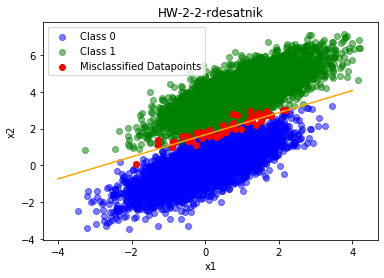

In [15]:
# Use different colors for class 0, class 1 and misclassified datapoints
# Use plt.scatter
# Dont forget to add axes titles, graph title, legend

#print(misclassifiedlist)
missed = np.array(misclassifiedlist)

def misclassline(formula, x_range):
    x = np.array(x_range)
    y = formula(x)
    plt.plot(x,y, c="orange")
    
def my_formula(x):
    return(-final_weights[0]-final_weights[1]*x)/final_weights[2]

misclassline(my_formula, range(-4,5))
#Misclassified Points
plt.scatter(x.x1,x.x2, c="blue", alpha=0.5, label="Class 0")
plt.scatter(y.x1,y.x2, c="green", alpha=0.5, label="Class 1")
plt.scatter(missed[:,0],missed[:, 1], c="red", label="Misclassified Datapoints")
plt.legend()
plt.title("HW-2-2-rdesatnik")
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

## Compare the results with sklearn's Logistic Regression

In [16]:
#Importing data for sklearn
import csv
x10list= [] 
x20list= [] 
with open("class0-input.csv") as csv_file: 
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        if row[0] == 'x1':
            skip = 1
        else:
            x10 = float(row[0])
            x20 = float(row[1])
            x10list.append(x10)
            x20list.append(x20)
x11list= [] 
x21list= [] 
with open("class1-input.csv") as csv_file: 
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        if row[0] == 'x1':
            skip = 1
        else:
            x11 = float(row[0])
            x21 = float(row[1])
            x11list.append(x11)
            x21list.append(x21)
y0list= [] 
y1list= [] 
with open("labels.csv") as csv_file: 
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        if row[0] == 'label':
            skip = 1
        elif float(row[0]) == 0:
            labeling = float(row[0])
            y0list.append(labeling)
        else:
            labeling = float(row[0])
            y1list.append(labeling)
            
            
print(len(y0list))
print(len(y1list))           
x10 = np.array(x10list)
x20 = np.array(x20list)
x11 = np.array(x11list)
x21 = np.array(x21list)
ylabel2 = np.array(y0list)
ylabel1 = np.array(y1list)


col_names = ['x1','x2','label']
conx1 = []
conx2 = []
conlabel = []
conx1 = x10.tolist() + x11.tolist()
conx2 = x20.tolist() + x21.tolist()
conlabel = ylabel2.tolist() + ylabel1.tolist()
datadic = {'x1': conx1,'x2': conx2,'label': conlabel}
dataset = pd.DataFrame(data = datadic)
dataset.head()

5000
5000


,x1,x2,label
0,-0.201517,-0.683358,0.0
1,0.374519,-0.828082,0.0
2,-0.161895,-1.247107,0.0
3,0.037711,-0.047303,0.0
4,-0.260479,1.770204,0.0


In [17]:
# import sklearn and necessary libraries
# Print the accuracy obtained by sklearn and your model
# import sklearn and necessary libraries
# Print the accuracy obtained by sklearn and your model
#LR
features = ['x1','x2']
x = dataset[features]
y = dataset.label
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(x,y)
SKlearn_accuracy = (clf.score(x,y))*100
My_accuracy = Accuracy 
print("sklearn accuracy is: " +str(SKlearn_accuracy)+ " My logistic regression: " +str(Accuracy))


sklearn accuracy is: 99.5 My logistic regression: 99.5


C:\Users\rdesa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [18]:
#The sklearn accuracy is higher then my algorithms accuracy because sklearn runs more iterations at a more effienct learning rate which increases accuracy 